# Question: Based on demographics, what activity or combination of activity results in the highest probability of a Promise to Pay (PTP)

In [9]:
import pandas as pd
from collections import Counter
import datetime
%matplotlib inline

In [27]:
df = pd.read_csv('lessmessyresults.csv')
df.drop('d_debtoridentityno', axis=1 , inplace=True)

- Based on a population sample from the historical Data table, I have filtered out the Data that only pertains to ABSA and data where a debtor has Promised To Pay

- Out of this filtered Data I calculate the probabilty of a PTP following the action of either a Phone Call or SMS

In [28]:
#len(dr[dr['HistoryAction_ID'] ==8])
#dr = dr[dr.line_race != 8]
#dr.query('line_race != 8')
dr = df[df.HistoryAction_ID != 8]


## Identity Numbers were dropped from the code to protect the clients information

In [29]:
df.head(n=200)

,IDX,CurrentBalance,DateArrangementMade,DateAp_Desc,Opening Balance,FirstInstalmentDueDate,FirstInstalmentDueDateAP_Running,HistoryAction_ID,H_DateTime
0,316191,36716.00,8/10/2017,Balance brought forward,36816.00,8/15/2017,36716.00,10,4/26/2017
1,609722,7704.53,8/11/2017,Balance brought forward,7704.53,8/31/2017,6849.90,10,4/24/2017
2,609770,3712.48,2/20/2018,Balance brought forward,4211.48,2/28/2018,3713.12,20,4/26/2017
3,605313,27930.50,4/3/2018,Balance brought forward,27930.50,4/30/2018,23430.50,20,4/26/2017
4,608773,5482.85,1/12/2018,Balance brought forward,7110.61,1/27/2018,6610.61,10,4/28/2017
5,608889,10842.05,3/15/2018,Balance brought forward,10842.05,4/14/2018,8739.15,6,4/21/2017
6,609142,1702.18,NaN,NaN,NaN,NaN,NaN,20,8/17/2017
7,616256,61696.43,2/8/2018,Balance brought forward,62696.43,2/17/2018,62196.43,10,4/24/2017
8,613765,57921.49,1/31/2018,Balance brought forward,59979.47,1/31/2018,58950.48,20,8/17/2017
9,614547,34276.60,3/7/2018,Balance brought forward,34376.60,3/31/2018,34276.60,20,4/26/2017


### 10 is SMS
### 6 is CALL
### 20 is Letter Run

In [13]:
tens = len(dr[dr.HistoryAction_ID == 10])
sixes = len(dr[dr.HistoryAction_ID == 6])
probability_of_CALL = sixes/len(dr)
probability_of_SMS = tens/len(dr)

In [14]:
probability_of_CALL

0.15458207452165157

## This shows that the probability that an CALL would result in a PTP is 0.1593  

In [15]:
probability_of_SMS

0.41289023162134947

## This shows that the probability that an SMS would result in a PTP is 0.4102

In [16]:
probability_of_CALL + probability_of_SMS

0.567472306143001

## For a combination of a phone call and SMS would result in a 0.5674 probability that a PTP would follow

- Next I list all the probabilities for all the possibly actions from the Excalibur Database

In [17]:
probs = {}
actions = range(0,21)
for action in actions:
    prob_of_action = len(dr[dr.HistoryAction_ID == action]) / len(dr)
    probs[action] = prob_of_action
probs

{0: 0.0,
 1: 0.0015105740181268882,
 2: 0.0015105740181268882,
 3: 0.06294058408862034,
 4: 0.006545820745216516,
 5: 0.0,
 6: 0.15458207452165157,
 7: 0.0015105740181268882,
 8: 0.0,
 9: 0.0015105740181268882,
 10: 0.41289023162134947,
 11: 0.03675730110775428,
 12: 0.014098690835850957,
 13: 0.002014098690835851,
 14: 0.0,
 15: 0.0010070493454179255,
 16: 0.008056394763343404,
 17: 0.02366565961732125,
 18: 0.0,
 19: 0.0,
 20: 0.2512588116817724}

### I then plot these probabilities on a bar graph for graphic representation

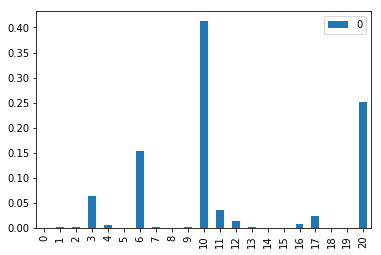

In [18]:
pd.DataFrame(list(probs.values())).plot(kind='bar')

### Demographics of the population group was not provided in the Excalibur dataset, 
### However I did write 2 sets of code that iterated through the identity numbers supplied in the dataset. 
### Then I had the algorithm iterate through every 7th digit in the identity numbers, this digit as per the Department of Home Affairs, represents an individuals Gender

In [19]:
def gender(row):
    ID = str(row['d_debtoridentityno'])
    if len(ID) != 13:
        return "Unknown"
    age_digit = int(ID[6])
    if 0 <= age_digit <= 4:
        return 'FEMALE'
    return 'MALE'

### From here I had the algorithm iterate through the first 6 digits and produce an age.

In [20]:
def age(row):
    ID = str(row['d_debtoridentityno'])
    if len(ID) != 13:
        return -1
    yob = int(ID[0:2])
    return 118-yob

#### I then add new columns to the data set called "Age" and "Gender" to further segment the statistics into demographics

In [21]:
dr['Gender'] = dr.apply(gender, axis=1)

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
dr['Age'] = dr.apply(age, axis=1)

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
#dr.to_csv('datesora.csv')

- Because not all people who take are debt are South African Citizens, not everyone would have provided their "ID NUMBERS", some individuals would have supplied their "Passport Number" 
- I believe this account for certain impossible ages like -1

In [25]:
dr['Age'].max()

89

In [ ]:
dr['Age'].min()

- I segment the new ages column into an interval of 25-75

In [23]:
dr = dr[(dr['Age'] >=25 ) & (dr['Age'] <= 75)]

#### I now split ages into incriments of 10

In [27]:
def age_range(start, end):
    return dr[(dr['Age'] >= start) & (dr['Age'] < end)]

Mid_twenties_to_thirties = age_range(25, 35)
Mid_thirties_to_fourties = age_range(35, 45)
Mid_fourties_to_fifties = age_range(45, 55)
Mid_fifties_to_sixties = age_range(55, 65)
Mid_sixties_to_seventies = age_range(65, 75)

In [28]:
def format_percentage(num):
    return ('%.10f' % num) + '%'

In [29]:
(len(dr[dr['Gender'] == "MALE" ]))/(len(dr['Gender'])) *100

55.70332480818414

In [30]:
(len(dr[dr['Gender'] == "FEMALE" ]))/(len(dr['Gender'])) *100

44.29667519181585

In [31]:
RTA_10 = dr[(dr['HistoryAction_ID'] == 10)]
def AGE_range(start, end):
    return RTA_10[(RTA_10['Age'] >= start) & (RTA_10['Age'] < end)]


Mid_20s_to_30s = AGE_range(25, 35)
Mid_30s_to_40s = AGE_range(35, 45)
Mid_40s_to_50s = AGE_range(45, 55)
Mid_50s_to_60s = AGE_range(55, 65)
Mid_60s_to_70s = AGE_range(65, 75)

In [32]:
RTA_6 = dr[(dr['HistoryAction_ID'] == 6)]
def AGES_range(start, end):
    return RTA_6[(RTA_6['Age'] >= start) & (RTA_6['Age'] < end)]


t20s_to_30s = AGES_range(25, 35)
t30s_to_40s = AGES_range(35, 45)
t40s_to_50s = AGES_range(45, 55)
t50s_to_60s = AGES_range(55, 65)
t60s_to_70s = AGES_range(65, 75)

In [33]:
RTA_20 = dr[(dr['HistoryAction_ID'] == 20)]
def AGES_Range(start, end):
    return RTA_6[(RTA_6['Age'] >= start) & (RTA_6['Age'] < end)]


p20s_to_30s = AGES_Range(25, 35)
p30s_to_40s = AGES_Range(35, 45)
p40s_to_50s = AGES_Range(45, 55)
p50s_to_60s = AGES_Range(55, 65)
p60s_to_70s = AGES_Range(65, 75)

In [34]:
print(format_percentage(Mid_twenties_to_thirties['Age'].count() / len(dr['Age']) *100))

11.5089514066%


In [35]:
print(format_percentage(Mid_thirties_to_fourties['Age'].count() / dr['Age'].count() *100))

29.2583120205%


In [36]:
print(format_percentage(Mid_fourties_to_fifties['Age'].count() / dr['Age'].count() *100))

33.2992327366%


In [37]:
print(format_percentage(Mid_fifties_to_sixties['Age'].count() / dr['Age'].count() *100))

19.1815856777%


In [38]:
print(format_percentage(Mid_sixties_to_seventies['Age'].count() / dr['Age'].count() *100))

6.7007672634%


### 40's to 50's account for largest percentage of people who make a PTP
### second largest is the 30's to 40's age group
### third is 50's to 60's age group

### The above show the percentage of each age incriment

In [39]:
# Percenatge of women in 20's to 30's range in the population sample
print(format_percentage(Mid_twenties_to_thirties[Mid_twenties_to_thirties.Gender == 'FEMALE']['Age'].count() / 
                        dr['Age'].count() *100))

# Percentage of women in 20's to 30's who PTP after "Phone Call"
print(format_percentage(Mid_20s_to_30s[Mid_20s_to_30s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of women in 20's to 30's who PTP after "SMS"
print(format_percentage(t20s_to_30s[t20s_to_30s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of women in 20's to 30's who PTP after "Letter Run"
print(format_percentage(p20s_to_30s[p20s_to_30s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

5.4219948849%
3.7406483791%
4.3189368771%
2.6262626263%


- 1) Percenatge of women in 20's to 30's range in the population sample
- 2) Percentage of women in 20's to 30's who PTP after "Phone Call"
- 3) Percentage of women in 20's to 30's who PTP after "SMS"
- 4) Percentage of women in 20's to 30's who PTP after "Letter Run"
- 5) From the above I gather that women in their 20s to 30's are most likely to make a PTP if they are "SMS'd"

In [42]:
# Percenatge of men in 20's to 30's range in the population sample
print(format_percentage(Mid_twenties_to_thirties[Mid_twenties_to_thirties.Gender == 'MALE']['Age'].count() / 
                        dr['Age'].count() *100))

# Percentage of men in 20's to 30's who PTP after "Phone Call"
print(format_percentage(Mid_20s_to_30s[Mid_20s_to_30s.Gender == 'MALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of men in 20's to 30's who PTP after "SMS"
print(format_percentage(t20s_to_30s[t20s_to_30s.Gender == 'MALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))



# Percentage of men in 20's to 30's who PTP after "Letter Run"
print(format_percentage(p20s_to_30s[p20s_to_30s.Gender == 'MALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

6.0869565217%
5.1122194514%
5.3156146179%
3.2323232323%


- 1) Percenatge of men in 20's to 30's range in the population sample
- 2) Percentage of men in 20's to 30's who PTP after "Phone Call"
- 3) Percentage of men in 20's to 30's who PTP after "SMS"
- 4) Percentage of men in 20's to 30's who PTP after "Letter Run"
- 5) From the above I gather that men in their 20s to 30's are most likely to make a PTP if they are "SMS'd"

In [43]:
# Percenatge of women in 30's to 40's range in the population sample
print(format_percentage(Mid_thirties_to_fourties[Mid_thirties_to_fourties.Gender == 'FEMALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of women in 30's to 40's who PTP after "Phone Call"
print(format_percentage(Mid_30s_to_40s[Mid_30s_to_40s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of women in 30's to 40's who PTP after "SMS"
print(format_percentage(t30s_to_40s[t30s_to_40s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of women in 30's to 40's who PTP after "Letter Run"
print(format_percentage(p30s_to_40s[p30s_to_40s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

13.4526854220%
12.2194513716%
12.6245847176%
7.6767676768%


- 1) Percenatge of women in 30's to 40's range in the population sample
- 2) Percentage of women in 30's to 40's who PTP after "Phone Call"
- 3) Percentage of women in 30's to 40's who PTP after "SMS"
- 4) Percentage of women in 30's to 40's who PTP after "Letter Run"
- 5) From the above I gather that women in their 20s to 30's are most likely to make a PTP if they are "SMS'd" and very closely followed by a Phone Call

In [44]:
# Percenatge of men in 30's to 40's range in the population sample
print(format_percentage(Mid_thirties_to_fourties[Mid_thirties_to_fourties.Gender == 'MALE']['Age'].count() / 
                        dr['Age'].count() *100))

# Percentage of men in 30's to 40's who PTP after "Phone Call"
print(format_percentage(Mid_30s_to_40s[Mid_30s_to_40s.Gender == 'MALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of men in 30's to 40's who PTP after "SMS"
print(format_percentage(t30s_to_40s[t30s_to_40s.Gender == 'MALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of men in 30's to 40's who PTP after "Letter Run"
print(format_percentage(p30s_to_40s[p30s_to_40s.Gender == 'MALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

15.8056265985%
14.8379052369%
17.2757475083%
10.5050505051%


- 1) Percenatge of men in 30's to 40's range in the population sample
- 2) Percentage of men in 30's to 40's who PTP after "Phone Call"
- 3) Percentage of men in 30's to 40's who PTP after "SMS"
- 4) Percentage of men in 30's to 40's who PTP after "Letter Run"
- 5) From the above I gather that men in their 30s to 40's are most likely to make a PTP if they are "SMS'd"

In [45]:
# Percenatge of women in 40's to 50's range in the population sample
print(format_percentage(Mid_fourties_to_fifties[Mid_fourties_to_fifties.Gender == 'FEMALE']['Age'].count() / 
                        dr['Age'].count() *100))

# Percentage of women in 40's to 50's who PTP after "Phone Call"
print(format_percentage(Mid_40s_to_50s[Mid_40s_to_50s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of women in 40's to 50's who PTP after "SMS"
print(format_percentage(t40s_to_50s[t40s_to_50s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of women in 40's to 50's who PTP after "Letter Run"
print(format_percentage(p40s_to_50s[p40s_to_50s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))


15.4475703325%
17.8304239401%
12.2923588040%
7.4747474747%


- 1) Percenatge of women in 40's to 50's range in the population sample
- 2) Percentage of women in 40's to 50's who PTP after "Phone Call"
- 3) Percentage of women in 40's to 50's who PTP after "SMS"
- 4) Percentage of women in 40's to 50's who PTP after "Letter Run"
- 5) From the above I gather that women in their 40s to 50's are most likely to make a PTP if they are "Called"

In [46]:
# Percenatge of men in 40's to 50's range in the population sample
print(format_percentage(Mid_fourties_to_fifties[Mid_fourties_to_fifties.Gender == 'MALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of men in 40's to 50's who PTP after "Phone Call"
print(format_percentage(Mid_40s_to_50s[Mid_40s_to_50s.Gender == 'MALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of men in 40's to 50's who PTP after "SMS"
print(format_percentage(t40s_to_50s[t40s_to_50s.Gender == 'MALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))

# Percentage of men in 40's to 50's who PTP after "Letter Run"
print(format_percentage(p40s_to_50s[p40s_to_50s.Gender == 'MALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

17.8516624041%
16.8329177057%
22.9235880399%
13.9393939394%


- 1) Percenatge of men in 40's to 50's range in the population sample
- 2) Percentage of men in 40's to 50's who PTP after "Phone Call"
- 3) Percentage of men in 40's to 50's who PTP after "SMS"
- 4) Percentage of men in 40's to 50's who PTP after "Letter Run"
- 5) From the above I gather that men in their 40s to 50's are most likely to make a PTP if they are "SMS'd"

In [47]:
# Percenatge of women in 50's to 60's range in the population sample
print(format_percentage(Mid_fifties_to_sixties[Mid_fifties_to_sixties.Gender == 'FEMALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of women in 50's to 60's who PTP after "Phone Call"
print(format_percentage(Mid_50s_to_60s[Mid_50s_to_60s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of women in 50's to 60's who PTP after "SMS"
print(format_percentage(t50s_to_60s[t50s_to_60s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of women in 50's to 60's who PTP after "Letter Run"
print(format_percentage(p50s_to_60s[p50s_to_60s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))


7.6726342711%
8.7281795511%
7.6411960133%
4.6464646465%


- 1) Percenatge of women in 50's to 60's range in the population sample
- 2) Percentage of women in 50's to 60's who PTP after "Phone Call"
- 3) Percentage of women in 50's to 60's who PTP after "SMS"
- 4) Percentage of women in 50's to 60's who PTP after "Letter Run"
- 5) From the above I gather that women in their 50s to 60's are most likely to make a PTP if they are "Called"

In [48]:
# Percenatge of men in 50's to 60's range in the population sample
print(format_percentage(Mid_fifties_to_sixties[Mid_fifties_to_sixties.Gender == 'MALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of men in 50's to 60's who PTP after "Phone Call"
print(format_percentage(Mid_50s_to_60s[Mid_50s_to_60s.Gender == 'MALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of men in 50's to 60's who PTP after "SMS"
print(format_percentage(t50s_to_60s[t50s_to_60s.Gender == 'MALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of men in 50's to 60's who PTP after "Letter Run"
print(format_percentage(p50s_to_60s[p50s_to_60s.Gender == 'MALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

11.5089514066%
12.5935162095%
10.9634551495%
6.6666666667%


- 1) Percenatge of men in 50's to 60's range in the population sample
- 2) Percentage of men in 50's to 60's who PTP after "Phone Call"
- 3) Percentage of men in 50's to 60's who PTP after "SMS"
- 4) Percentage of men in 50's to 60's who PTP after "Letter Run"
- 5) From the above I gather that women in their 20s to 30's are most likely to make a PTP if they are "Called"

In [49]:
# Percenatge of women in 60's to 70's range in the population sample
print(format_percentage(Mid_sixties_to_seventies[Mid_sixties_to_seventies.Gender == 'FEMALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of women in 60's to 70's who PTP after "Phone Call"
print(format_percentage(Mid_60s_to_70s[Mid_60s_to_70s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))

# Percentage of women in 60's to 70's who PTP after "SMS"
print(format_percentage(t60s_to_70s[t60s_to_70s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))


# Percentage of women in 60's to 70's who PTP after "Letter Run"
print(format_percentage(p60s_to_70s[p60s_to_70s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

2.2506393862%
1.7456359102%
2.3255813953%
1.4141414141%


- 1) Percenatge of women in 60's to 70's range in the population sample
- 2) Percentage of women in 60's to 70's who PTP after "Phone Call"
- 3) Percentage of women in 60's to 70's who PTP after "SMS"
- 4) Percentage of women in 60's to 70's who PTP after "Letter Run"
- 5) From the above I gather that women in their 60s to 70's are most likely to make a PTP if they are "SMS'd"

In [50]:
# Percenatge of men in 60's to 70's range in the population sample
print(format_percentage(Mid_sixties_to_seventies[Mid_sixties_to_seventies.Gender == 'MALE']['Age'].count() / 
                        dr['Age'].count() *100))


# Percentage of men in 60's to 70's who PTP after "Phone Call"
print(format_percentage(Mid_60s_to_70s[Mid_60s_to_70s.Gender == 'FEMALE']['Age'].count() / 
                        RTA_10['Age'].count() *100))


# Percentage of men in 60's to 70's who PTP after "SMS"
print(format_percentage(t60s_to_70s[t60s_to_70s.Gender == 'MALE']['Age'].count() / 
                        RTA_6['Age'].count() *100))

# Percentage of men in 60's to 70's who PTP after "Letter Run"
print(format_percentage(p60s_to_70s[p60s_to_70s.Gender == 'MALE']['Age'].count() / 
                        RTA_20['Age'].count() *100))

4.4501278772%
1.7456359102%
4.3189368771%
2.6262626263%


- 1) Percenatge of men in 60's to 70's range in the population sample
- 2) Percentage of men in 60's to 70's who PTP after "Phone Call"
- 3) Percentage of men in 60's to 70's who PTP after "SMS"
- 4) Percentage of men in 60's to 70's who PTP after "Letter Run"
- 5) From the above I gather that men in their 60s to 70's are most likely to make a PTP if they are "SMS'd"